In [257]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [258]:
import os, sys


def get_dir_n_levels_up(path, n):
    # Go up n levels from the given path
    for _ in range(n):
        path = os.path.dirname(path)
    return path


proj_root = get_dir_n_levels_up(os.path.abspath("__file__"), 4)
sys.path.append(proj_root)

import warnings
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

warnings.filterwarnings("ignore")

from dqn.opinion_dynamics.utils.experiment import process_experiment

In [259]:
# experiment_sub_dir = "2025May02-101004_configs" # excellent run
# experiment_sub_dir = "2025Jul09-171538_configs" # good latest run
# experiment_sub_dir = "2025Sep15-090310_configs" paper run 1 finite h

# experiment_sub_dir = "2025Oct15-095412_configs"
# experiment_sub_dir = "2025Oct16-023909_configs" # linear term state
# experiment_sub_dir = "2025Oct16-100935_configs" # coca no term state
# experiment_sub_dir = "2025Oct17-101225_configs" # coca no term state higher lr
# experiment_sub_dir = "2025Oct17-154612_configs" # coca no term state higher lr more epochs
# experiment_sub_dir = "2025Oct18-002003_configs" # coca no term state higher lr new params
# experiment_sub_dir = "2025Oct18-135551_configs" # coca no term state higher lr new params
# experiment_sub_dir = "2025Oct19-030258_configs" # coca no term state higher lr even more new params
# experiment_sub_dir = "2025Oct19-182701_configs" # coca no term state higher lr even more new params
experiment_sub_dir = (
    "2025Oct20-135712_configs"  # coca no term state higher lr even more new params
)


exp_path = os.path.join(os.path.abspath("."), "results", experiment_sub_dir)
df = process_experiment(exp_path)
# df.columns

In [260]:
# df

In [261]:
# df[df['epoch_type'] == 'validation']
# df[df['epoch_type'] == 'training']

In [262]:
# Define hyperparameter columns
hyperparam_columns = [col for col in df.columns if "sub_exp_cfg" in col]

# Group by hyperparameter values and compute mean episode_rewards_mean
averaged_results = df.groupby(hyperparam_columns, as_index=False).agg(
    {
        "episode_rewards_mean": "mean",  # Averaging the performance metric
        "sub_experiment_path": "first",  # Keep a reference to an experiment path
    }
)

# Find the best hyperparameter set based on the highest mean reward
best_row = averaged_results.loc[averaged_results["episode_rewards_mean"].idxmax()]

# Print the best experiment path and hyperparameters
print(f"Best hyperparameters:\n{best_row[hyperparam_columns]}")
print(f"Best mean reward: {best_row['episode_rewards_mean']}")

Best hyperparameters:
sub_exp_cfg_estimator.model                       OpinionNet
sub_exp_cfg_optim.args_.lr                            0.0001
sub_exp_cfg_agent_params.args_.target_soft_tau         0.003
sub_exp_cfg_experiment                             fixed_res
Name: 1, dtype: object
Best mean reward: -13.644728678705064


In [263]:
averaged_results

,sub_exp_cfg_estimator.model,sub_exp_cfg_optim.args_.lr,sub_exp_cfg_agent_params.args_.target_soft_tau,sub_exp_cfg_experiment,episode_rewards_mean,sub_experiment_path
0,OpinionNet,0.0001,0.0005,fixed_res,-21.168588,d:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...
1,OpinionNet,0.0001,0.003,fixed_res,-13.644729,d:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...
2,OpinionNet,5e-05,0.0005,fixed_res,-20.014215,d:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...
3,OpinionNet,5e-05,0.003,fixed_res,-16.294492,d:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...
4,OpinionNetCommonAB,0.0001,0.0005,fixed_res,-17.334078,d:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...
5,OpinionNetCommonAB,0.0001,0.003,fixed_res,-23.005103,d:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...
6,OpinionNetCommonAB,5e-05,0.0005,fixed_res,-17.670077,d:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...
7,OpinionNetCommonAB,5e-05,0.003,fixed_res,-19.421395,d:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...


In [264]:
# selected_metric = 'episode_rewards_mean'
# hue_col = "sub_exp_cfg_agent_params.args_.action_w_noise_amplitude"

# # Filter for validation episodes
# validation_df = df[df['epoch_type'] == 'validation']

# # Get the unique sorted frame_stamp values
# unique_frames = np.sort(validation_df['frame_stamp'].unique())
# N = 1
# # Get all frame_stamp values after the first N unique ones
# filtered_frames = unique_frames[N:]

# # Filter the DataFrame to only include rows with these frame_stamp values
# filtered_df = validation_df[validation_df['frame_stamp'].isin(filtered_frames)]

# plt.figure(figsize=(10, 6))
# sns.lineplot(data=filtered_df, x='frame_stamp', y=selected_metric, hue=hue_col)
# plt.ylabel(selected_metric)
# plt.xlabel('Frame Stamp')
# plt.show()

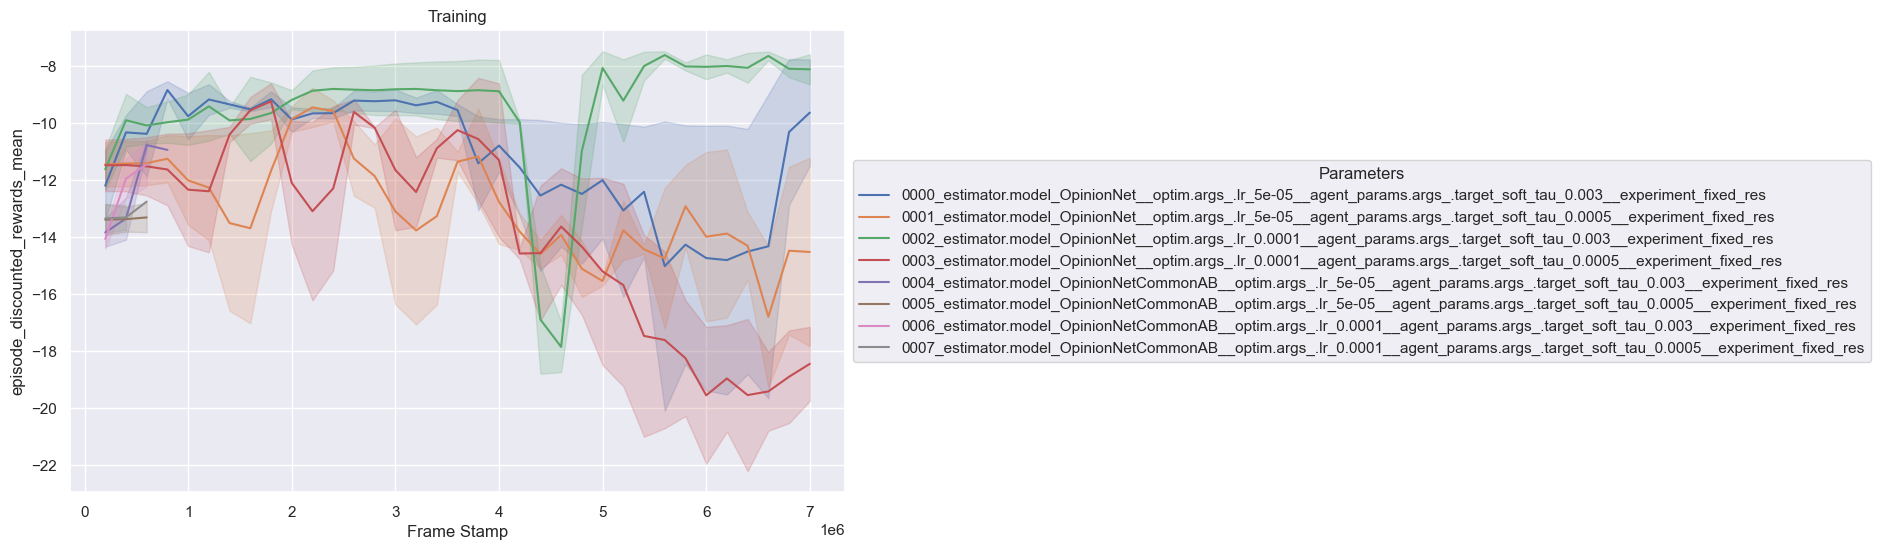

In [265]:
selected_metric = "episode_discounted_rewards_mean"
# hue_col = "sub_exp_cfg_agent_params.args_.action_w_noise_amplitude"
hue_col = "experiment_name"

validation_df = df[df["epoch_type"] == "training"]

# Create a new figure for each environment
plt.figure(figsize=(10, 6))
# sns.lineplot(data=df, x='frame_stamp', y=selected_metric, hue='model')
sns.lineplot(
    data=validation_df,
    x="frame_stamp",
    y=selected_metric,
    hue=hue_col,
    #  units='seed', # Comment this to see mean + cf
    #  estimator=None, # Comment this to see mean + cf
)

plt.ylabel(selected_metric)
plt.xlabel("Frame Stamp")
plt.title("Training")

# Place the legend outside the plot
plt.legend(loc="center left", bbox_to_anchor=(1.0, 0.5), title="Parameters")
plt.show()

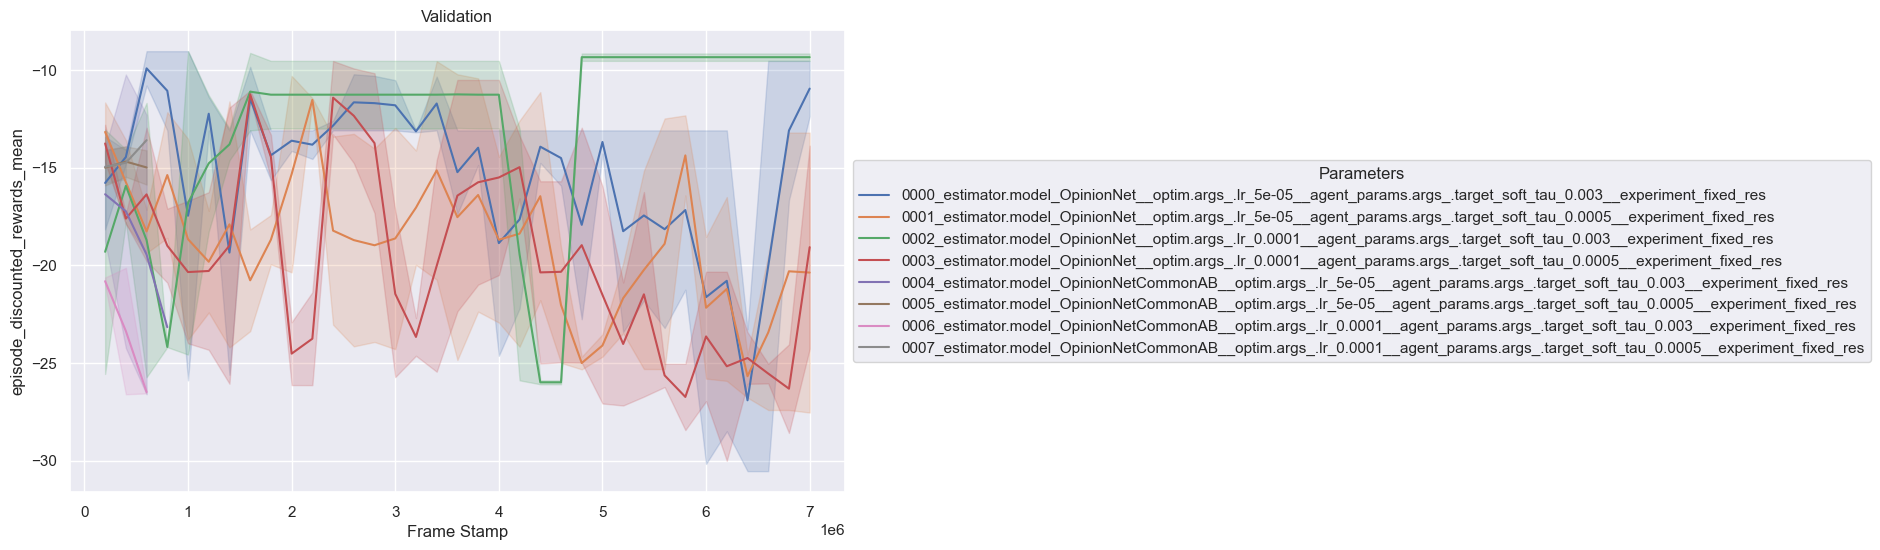

In [266]:
selected_metric = "episode_discounted_rewards_mean"
# hue_col = "sub_exp_cfg_agent_params.args_.action_w_noise_amplitude"
hue_col = "experiment_name"

validation_df = df[df["epoch_type"] == "validation"]
# validation_df = df[df['epoch_type'] == 'training']


# Create a new figure for each environment
plt.figure(figsize=(10, 6))
# sns.lineplot(data=df, x='frame_stamp', y=selected_metric, hue='model')
sns.lineplot(
    data=validation_df,
    x="frame_stamp",
    y=selected_metric,
    hue=hue_col,
    #  units='seed', # Comment this to see mean + cf
    #  estimator=None, # Comment this to see mean + cf
)

plt.ylabel(selected_metric)
plt.xlabel("Frame Stamp")
plt.title("Validation")

# Place the legend outside the plot
plt.legend(loc="center left", bbox_to_anchor=(1.0, 0.5), title="Parameters")
plt.show()

In [267]:
df.columns

Index(['epoch_type', 'frame_stamp', 'greedy_epsilon', 'episode_rewards_min',
       'episode_rewards_max', 'episode_rewards_mean', 'episode_rewards_median',
       'episode_rewards_std', 'episode_discounted_rewards_min',
       'episode_discounted_rewards_max', 'episode_discounted_rewards_mean',
       'episode_discounted_rewards_median', 'episode_discounted_rewards_std',
       'episode_frames_min', 'episode_frames_max', 'episode_frames_mean',
       'episode_frames_median', 'episode_frames_std', 'episode_losses_min',
       'episode_losses_max', 'episode_losses_mean', 'episode_losses_median',
       'episode_losses_std', 'episode_max_qs_min', 'episode_max_qs_max',
       'episode_max_qs_mean', 'episode_max_qs_median', 'episode_max_qs_std',
       'policy_trained_times', 'target_trained_times', 'epoch_time',
       'sub_exp_cfg_estimator.model', 'sub_exp_cfg_optim.args_.lr',
       'sub_exp_cfg_agent_params.args_.target_soft_tau',
       'sub_exp_cfg_experiment', 'sub_experiment_path'

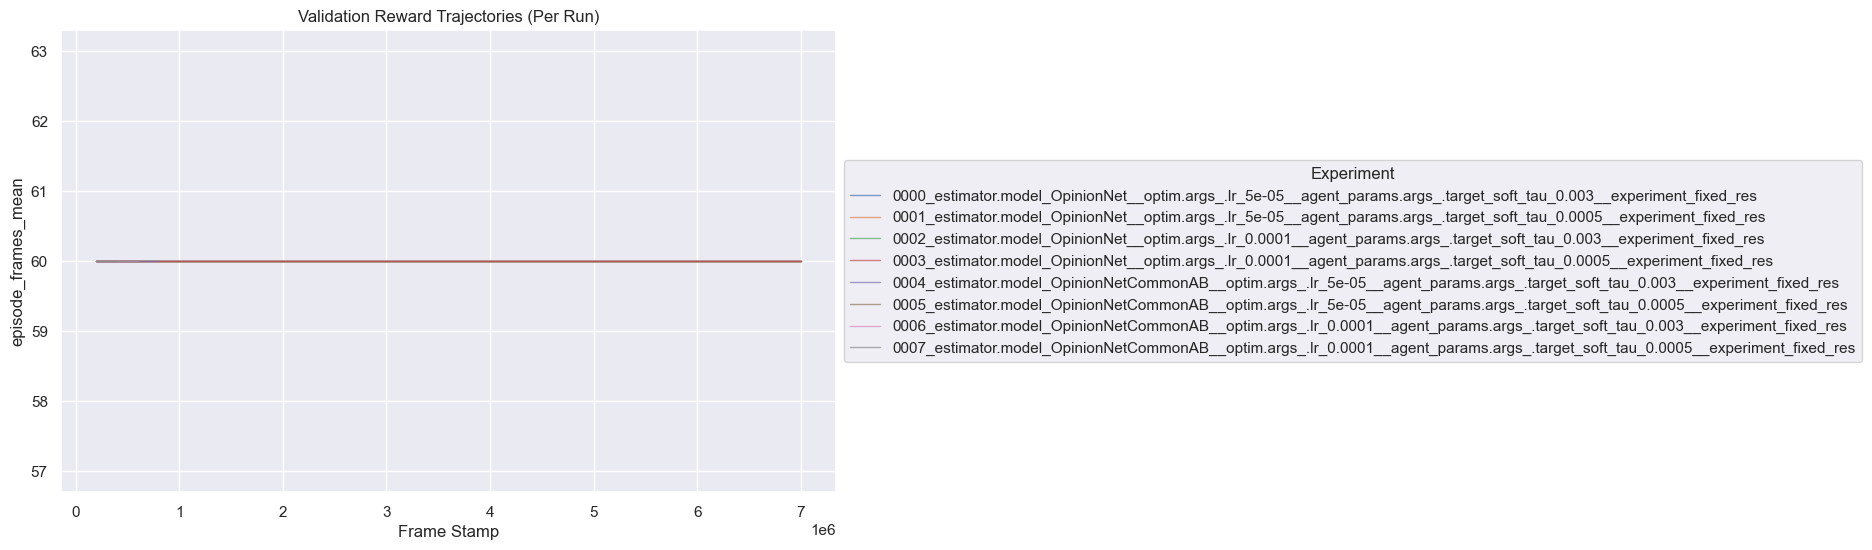

In [268]:
import matplotlib.pyplot as plt
import seaborn as sns

selected_metric = "episode_frames_mean"
hue_col = (
    "experiment_name"  # or another distinguishing column like "sub_experiment_path"
)

validation_df = df[df["epoch_type"] == "validation"]

# Plot individual lines for each run
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=validation_df,
    x="frame_stamp",
    y=selected_metric,
    hue=hue_col,
    estimator=None,  # ← disables aggregation
    units="sub_experiment_path",  # ← groups lines by unique run
    lw=1,  # line width
    alpha=0.7,  # transparency
)

plt.ylabel(selected_metric)
plt.xlabel("Frame Stamp")
plt.title("Validation Reward Trajectories (Per Run)")

# Move legend outside the plot
plt.legend(loc="center left", bbox_to_anchor=(1.0, 0.5), title="Experiment")
plt.tight_layout()
plt.show()

In [269]:
### Select data

experiment_columns = [
    "epoch_type",
    "frame_stamp",
    "episode_rewards_mean",
    "episode_frames_mean",
    "episode_discounted_rewards_mean",
    "policy_trained_times",
    "target_trained_times",
    "epoch_time",
    "seed",
    "experiment_name",
    "sub_experiment_path",
]
hyperparam_columns = [col for col in df.columns if "sub_exp_cfg" in col]

cols_of_interest = experiment_columns + hyperparam_columns

sub_df = df[cols_of_interest]
sub_df = sub_df[sub_df["epoch_type"] == "validation"]
sub_df = sub_df[sub_df["frame_stamp"] == sub_df["frame_stamp"].max()]

sub_df

,epoch_type,frame_stamp,episode_rewards_mean,episode_frames_mean,episode_discounted_rewards_mean,policy_trained_times,target_trained_times,epoch_time,seed,experiment_name,sub_experiment_path,sub_exp_cfg_estimator.model,sub_exp_cfg_optim.args_.lr,sub_exp_cfg_agent_params.args_.target_soft_tau,sub_exp_cfg_experiment
69,validation,7000000,-11.193128,60.0,-9.537115,NaN,NaN,0 days 00:00:11.795356,0,0000_estimator.model_OpinionNet__optim.args_.l...,d:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,OpinionNet,5e-05,0.003,fixed_res
139,validation,7000000,-15.076284,60.0,-12.375952,NaN,NaN,0 days 00:00:11.614390,1,0000_estimator.model_OpinionNet__optim.args_.l...,d:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,OpinionNet,5e-05,0.003,fixed_res
209,validation,7000000,-36.270459,60.0,-27.532696,NaN,NaN,0 days 00:00:11.588953,0,0001_estimator.model_OpinionNet__optim.args_.l...,d:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,OpinionNet,5e-05,0.0005,fixed_res
279,validation,7000000,-16.074199,60.0,-13.206852,NaN,NaN,0 days 00:00:11.886196,1,0001_estimator.model_OpinionNet__optim.args_.l...,d:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,OpinionNet,5e-05,0.0005,fixed_res
349,validation,7000000,-11.193128,60.0,-9.537115,NaN,NaN,0 days 00:00:11.604667,0,0002_estimator.model_OpinionNet__optim.args_.l...,d:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,OpinionNet,0.0001,0.003,fixed_res
419,validation,7000000,-10.729138,60.0,-9.159560,NaN,NaN,0 days 00:00:11.711083,1,0002_estimator.model_OpinionNet__optim.args_.l...,d:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,OpinionNet,0.0001,0.003,fixed_res
489,validation,7000000,-16.457388,60.0,-13.875680,NaN,NaN,0 days 00:00:11.732244,0,0003_estimator.model_OpinionNet__optim.args_.l...,d:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,OpinionNet,0.0001,0.0005,fixed_res
559,validation,7000000,-31.412824,60.0,-24.266183,NaN,NaN,0 days 00:00:12.429086,1,0003_estimator.model_OpinionNet__optim.args_.l...,d:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,OpinionNet,0.0001,0.0005,fixed_res


In [270]:
agg_cols = [col for col in sub_df.columns if "sub_exp_cfg" in col]
aggregated_df = (
    sub_df.groupby(agg_cols)
    .agg(episode_discounted_rewards_mean=("episode_discounted_rewards_mean", "mean"))
    .reset_index()
)
aggregated_df

,sub_exp_cfg_estimator.model,sub_exp_cfg_optim.args_.lr,sub_exp_cfg_agent_params.args_.target_soft_tau,sub_exp_cfg_experiment,episode_discounted_rewards_mean
0,OpinionNet,0.0001,0.0005,fixed_res,-19.070932
1,OpinionNet,0.0001,0.003,fixed_res,-9.348337
2,OpinionNet,5e-05,0.0005,fixed_res,-20.369774
3,OpinionNet,5e-05,0.003,fixed_res,-10.956533


In [271]:
sub_df.columns

Index(['epoch_type', 'frame_stamp', 'episode_rewards_mean',
       'episode_frames_mean', 'episode_discounted_rewards_mean',
       'policy_trained_times', 'target_trained_times', 'epoch_time', 'seed',
       'experiment_name', 'sub_experiment_path', 'sub_exp_cfg_estimator.model',
       'sub_exp_cfg_optim.args_.lr',
       'sub_exp_cfg_agent_params.args_.target_soft_tau',
       'sub_exp_cfg_experiment'],
      dtype='object')

In [272]:
print(
    sub_df[sub_df["episode_rewards_mean"] == sub_df["episode_rewards_mean"].max()][
        "sub_experiment_path"
    ].values[0]
)

d:\Work\repos\RL\phd-rl-algos\dqn\opinion_dynamics\experiments\results\2025Oct20-135712_configs\0002_estimator.model_OpinionNet__optim.args_.lr_0.0001__agent_params.args_.target_soft_tau_0.003__experiment_fixed_res\1


In [273]:
sub_df[sub_df["episode_rewards_mean"] == sub_df["episode_rewards_mean"].max()]

,epoch_type,frame_stamp,episode_rewards_mean,episode_frames_mean,episode_discounted_rewards_mean,policy_trained_times,target_trained_times,epoch_time,seed,experiment_name,sub_experiment_path,sub_exp_cfg_estimator.model,sub_exp_cfg_optim.args_.lr,sub_exp_cfg_agent_params.args_.target_soft_tau,sub_exp_cfg_experiment
419,validation,7000000,-10.729138,60.0,-9.15956,NaN,NaN,0 days 00:00:11.711083,1,0002_estimator.model_OpinionNet__optim.args_.l...,d:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,OpinionNet,0.0001,0.003,fixed_res


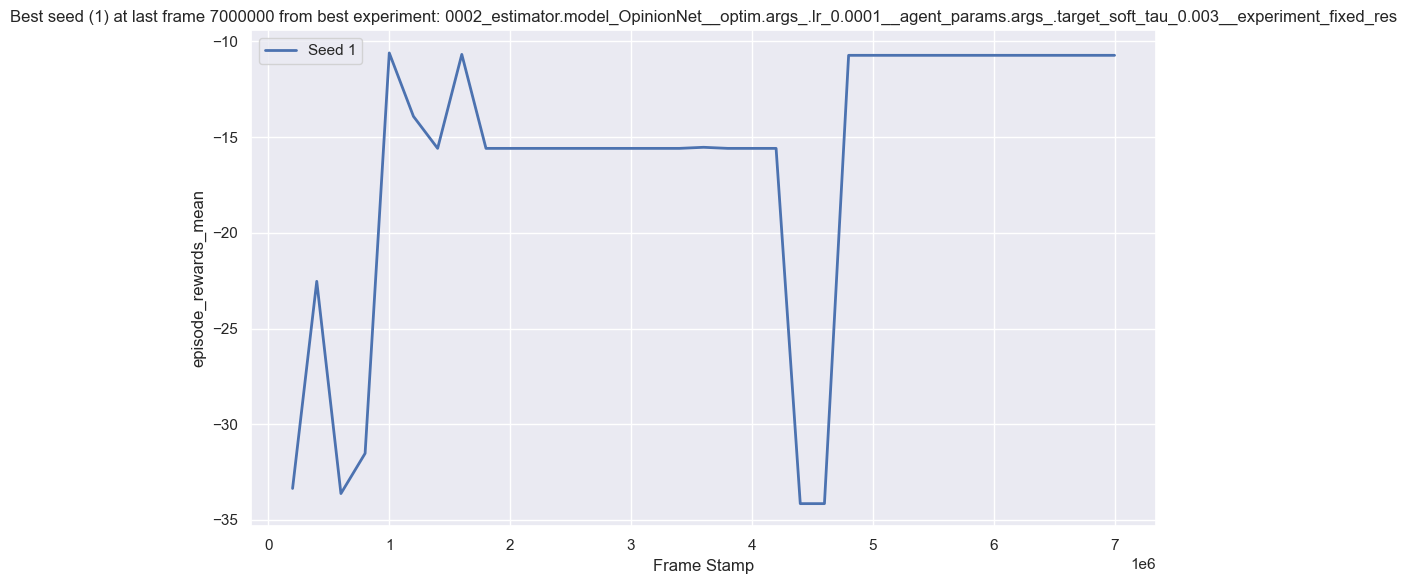

In [274]:
selected_metric = "episode_rewards_mean"
hue_col = "experiment_name"

val_df = df[df["epoch_type"] == "validation"].copy()

# 1) Last global frame
last_frame = val_df["frame_stamp"].max()
last_df = val_df[val_df["frame_stamp"] == last_frame]

# 2) Best experiment by mean at LAST frame (averaged across seeds)
best_experiment = last_df.groupby(hue_col)[selected_metric].mean().idxmax()

# 3) Within that experiment, the best seed at LAST frame
best_seed = (
    last_df[last_df[hue_col] == best_experiment]
    .groupby("seed")[selected_metric]
    .mean()
    .idxmax()
)

# 4) Plot the whole curve for that experiment+seed (not just the final point)
best_seed_df = val_df[
    (val_df[hue_col] == best_experiment) & (val_df["seed"] == best_seed)
]

plt.figure(figsize=(10, 6))
sns.lineplot(
    data=best_seed_df,
    x="frame_stamp",
    y=selected_metric,
    lw=2,
    label=f"Seed {best_seed}",
)
plt.title(
    f"Best seed ({best_seed}) at last frame {last_frame} from best experiment: {best_experiment}"
)
plt.ylabel(selected_metric)
plt.xlabel("Frame Stamp")
plt.legend()
plt.tight_layout()
plt.show()

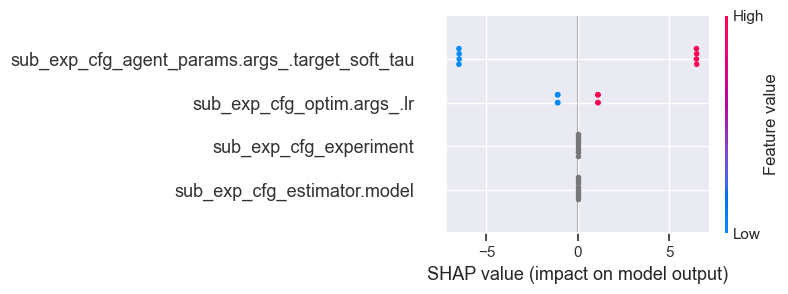

In [275]:
import shap
import xgboost
import pandas as pd


# Define the target metric and hyperparameter columns
target_metric = "episode_rewards_mean"  # Replace with actual metric column name
# Replace with actual hyperparameter column names

# Prepare data
X = sub_df[hyperparam_columns].apply(pd.to_numeric, errors="coerce")
y = sub_df[target_metric].fillna(3 * sub_df[target_metric].min())

# Train an XGBoost model to analyze feature importance
model = xgboost.XGBRegressor(
    objective="reg:squarederror", n_estimators=100, random_state=42
)
model.fit(X, y)

# SHAP analysis
explainer = shap.Explainer(model)
shap_values = explainer(X)

# Summary plot (feature importance)
shap.summary_plot(shap_values, X)

In [276]:
# Minimal cell to PRINT compact SHAP data you can paste back here

import numpy as np
import pandas as pd

# Use the same X and shap_values from your previous cell
X_num = X.apply(pd.to_numeric, errors="coerce").fillna(X.median(numeric_only=True))

# Global importance = mean(|SHAP|) per feature
sv = shap_values
vals = (
    sv.values if hasattr(sv, "values") else sv
)  # support both SHAP objects & raw arrays
mean_abs = np.mean(np.abs(vals), axis=0)

# Direction: correlation between SHAP value and raw feature (helps read summary plot colors)
corrs = []
for i, col in enumerate(X_num.columns):
    xcol = X_num.iloc[:, i].to_numpy()
    sval = vals[:, i]
    # robust correlation: handle constant columns or NaNs
    if np.allclose(xcol, xcol[0]) or np.all(np.isnan(xcol)):
        corrs.append(np.nan)
    else:
        c = np.corrcoef(xcol, sval)[0, 1]
        corrs.append(c)

global_df = pd.DataFrame(
    {
        "feature": X_num.columns,
        "mean_abs_shap": mean_abs,
        "corr_sign": np.sign(
            corrs
        ),  # +1 ≈ higher feature -> higher prediction; -1 opposite
        "corr_value": corrs,
    }
).sort_values("mean_abs_shap", ascending=False)

# Keep per-row SHAP small: only top-10 features
topk = 10 if len(global_df) > 10 else len(global_df)
top_feats = global_df["feature"].head(topk).tolist()
top_idx = [X_num.columns.get_loc(f) for f in top_feats]
perrow_df = pd.DataFrame(vals[:, top_idx], columns=top_feats, index=sub_df.index)

# Also handy context
meta_df = pd.DataFrame(
    {"prediction": model.predict(X_num), target_metric: sub_df[target_metric].values},
    index=sub_df.index,
)

# ---- PRINT CSV blocks you can paste here ----
print("# --- shap_global.csv ---")
print(global_df.to_csv(index=False))

print("# --- shap_values_top10.csv ---")
print(perrow_df.to_csv())

print("# --- shap_meta.csv ---")
print(meta_df.to_csv())

# --- shap_global.csv ---
feature,mean_abs_shap,corr_sign,corr_value
sub_exp_cfg_agent_params.args_.target_soft_tau,6.502581,1.0,0.9999992522197348
sub_exp_cfg_optim.args_.lr,1.1023248,1.0,0.9999739778961658
sub_exp_cfg_estimator.model,0.0,,
sub_exp_cfg_experiment,0.0,,

# --- shap_values_top10.csv ---
,sub_exp_cfg_agent_params.args_.target_soft_tau,sub_exp_cfg_optim.args_.lr,sub_exp_cfg_estimator.model,sub_exp_cfg_experiment
69,6.5105333,-1.0943724,0.0,0.0
139,6.5105333,-1.0943724,0.0,0.0
209,-6.5105333,-1.1102774,0.0,0.0
279,-6.5105333,-1.1102774,0.0,0.0
349,6.494629,1.0943724,0.0,0.0
419,6.494629,1.0943724,0.0,0.0
489,-6.494629,1.1102774,0.0,0.0
559,-6.494629,1.1102774,0.0,0.0

# --- shap_meta.csv ---
,prediction,episode_rewards_mean
69,-13.13466,-11.193128085027686
139,-13.13466,-15.076284318423152
209,-26.171633,-36.270458991901876
279,-26.171633,-16.07419887451337
349,-10.961816,-11.193128085027686
419,-10.961816,-10.729138187247486
489,-23.935165,-16.45738835171804
559,-23.93516

In [277]:
hyperparam_columns

['sub_exp_cfg_estimator.model',
 'sub_exp_cfg_optim.args_.lr',
 'sub_exp_cfg_agent_params.args_.target_soft_tau',
 'sub_exp_cfg_experiment']

In [278]:
import plotly.express as px

# --- config ---
target_col = "episode_rewards_mean"  # your target metric
color_col = "experiment_name"  # optional color grouping
readable_names = {
    # optional friendly names; falls back to raw column name if missing
    # "hp_raw_name": "Pretty Name",
}

# --- build plots ---
varying_hps = [hp for hp in hyperparam_columns if sub_df[hp].nunique(dropna=False) > 1]

if not varying_hps:
    print("No hyperparameters with more than one unique value — nothing to plot.")
else:
    for hp in varying_hps:
        # Rename only the current x column (leave others as-is for hover)
        x_name = readable_names.get(hp, hp)
        plot_df = sub_df.rename(columns={hp: x_name})

        fig = px.scatter(
            plot_df,
            x=x_name,
            y=target_col,
            color=color_col if color_col in plot_df.columns else None,
            hover_data=hyperparam_columns,  # handy to inspect full config per point
            title=f"{target_col} vs {x_name} (varying: {sub_df[hp].nunique(dropna=False)})",
            height=500,
        )
        fig.update_traces(mode="markers", marker=dict(size=8, opacity=0.8))
        fig.update_layout(showlegend=False)
        fig.show()